In [1]:
import numpy as np
from math import floor
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from matplotlib.animation import Animation
from IPython.display import HTML
from scipy.integrate import odeint

In [2]:
def RK4(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    
    k1 = h*f(x, t)
    k2 = h*f(x + (1/2)*k1, t + (1/2)*h)
    k3 = h*f(x + (1/2)*k2, t + (1/2)*h)
    k4 = h*f(x + k3, t + h)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

In [3]:
# Plot Jupiter's known orbit and saturn with constant step size

Msun = 1.9891e30
Mjup, Rjup, Vjup = 1.89e27, 778e9, 13.07e3
Msat, Rsat, Vsat = 5.683e26, 1.4e12, 9.6e3
Mear, Rear, Vear = 5.972e24, 149.6e9, 30e3
Mpro, Rpro, Vpro = 721.9, 6371e3 + Rear, 11e3
G = 6.6738e-11

def f(r, t):
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = r
    
    fxe = -G*Msun*xe / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(xe - xj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xe - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fye = -G*Msun*ye / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(ye - yj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(ye - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    fxj = -G*Msun*xj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(xj - xe) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xj - xs) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
    fyj = -G*Msun*yj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(yj - ye) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(yj - ys) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
  
    fxs = -G*Msun*xs / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(xs - xj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(xs - xe) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fys = -G*Msun*ys / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(ys - yj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(ys - ye) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    fxp = -G*Msun*xp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(xp - xj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(xp - xe) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(xp - xs) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    fyp = -G*Msun*yp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(yp - yj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(yp - ye) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(yp - ys) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    
    return np.array([dxdte, dydte, fxe, fye, dxdtj, dydtj, fxj, fyj, dxdts, dydts, fxs, fys, dxdtp, dydtp, fxp, fyp])

h = 86400 # one day
t_values = np.arange(0, 9.2896e8 + h, h)

xe, ye, dxdte, dydte = 0, Rear, -Vear, 0
xj, yj, dxdtj, dydtj = 0, Rjup, -Vjup, 0
xs, ys, dxdts, dydts = 0, Rsat, -Vsat, 0
xp, yp, dxdtp, dydtp = 0, Rpro, 0, Vpro

ear_x = []
ear_y = []
jup_x = []
jup_y = []
sat_x = []
sat_y = []
pro_x = []
pro_y = []

progress = display.ProgressBar(len(t_values))
progress.display()

for t in t_values:
    ear_x.append(xe)
    ear_y.append(ye)
    
    jup_x.append(xj)
    jup_y.append(yj)
    
    sat_x.append(xs)
    sat_y.append(ys)
    
    pro_x.append(xp)
    pro_y.append(yp)
    
    progress.progress += 1
    
    r = (xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp)
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = RK4(f, r, t, h)
    

[============================================================] 10753/10753

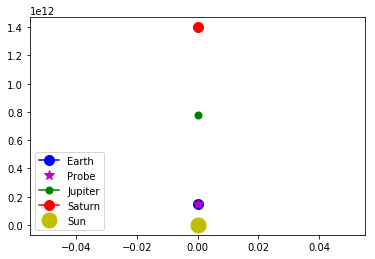

In [4]:
plt.plot(ear_x[0], ear_y[0], 'bo-', markersize = 10, label = 'Earth')
plt.plot(pro_x[0], pro_y[0], 'm*', markersize = 10, label = 'Probe')
plt.plot(jup_x[0], jup_y[0], 'go-', markersize = 7, label = 'Jupiter')
plt.plot(sat_x[0], sat_y[0], 'ro-', markersize = 10, label = 'Saturn')

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')

plt.legend(loc = 'lower left')
plt.show()

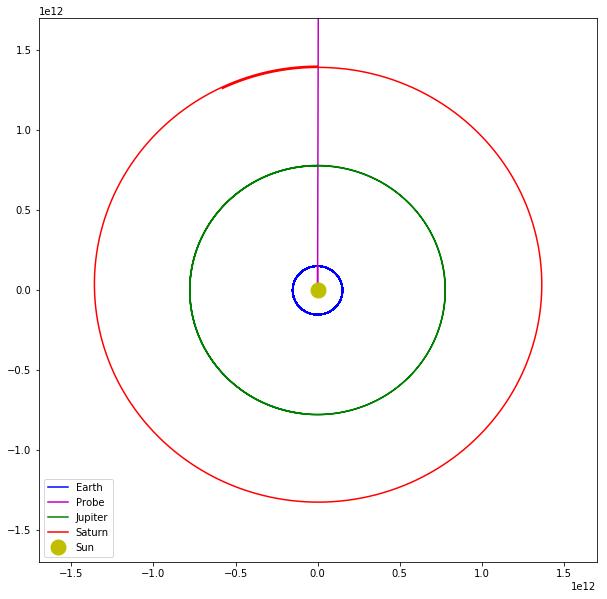

In [5]:
plt.figure(figsize = (10, 10))
plt.plot(ear_x, ear_y, 'b-', markersize = 10, label = 'Earth')
plt.plot(pro_x, pro_y, 'm-', markersize = 10, label = 'Probe')
plt.plot(jup_x, jup_y, 'g-', markersize = 7, label = 'Jupiter')
plt.plot(sat_x, sat_y, 'r-', markersize = 10, label = 'Saturn')

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.7e12)
plt.legend(loc = 'lower left')
plt.show()

In [6]:
fig = plt.figure(figsize = (10, 10))

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.plot(xe, ye, 'b-', markersize = 10)
plt.plot(xp, yp, 'm-', markersize = 10)
plt.plot(xj, yj, 'g-', markersize = 10)
plt.plot(xs, ys, 'r-', markersize = 10)

line1, = plt.plot([], 'bo', markersize = 8, label = 'Earth')
line2, = plt.plot([], 'go', markersize = 8, label = 'Jupiter')
line3, = plt.plot([], 'ro', markersize = 8, label = 'Saturn')
line4, = plt.plot([], 'm*', markersize = 8, label = 'Probe')

plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.7e12)
plt.legend(loc = 'lower left')

progress = display.ProgressBar(len(t_values))
progress.display()

def animate(frame):
    
    line1.set_data(ear_x[frame*20], ear_y[frame*20])
    line2.set_data(jup_x[frame*20], jup_y[frame*20])
    line3.set_data(sat_x[frame*20], sat_y[frame*20])
    line4.set_data(pro_x[frame*20], pro_y[frame*20])
    
    progress.progress += 10
    
    return line1, line2, line3, line4
    
anim = FuncAnimation(fig, animate, frames = len(ear_x) // 20, interval = 20)
plt.close()
HTML(anim.to_html5_video())

[============================================================] 10760/10753

In [7]:
anim.save("Voyagerfail.mp4", writer="ffmpeg")

In [8]:
# slingshot code

def slingshot(xp0, yp0, vpx, vpy, x0, y0, dxdt0, dydt0):
    Mp = 80
    G = 1
    h = 0.01
    t_values = np.arange(0, 8, h)
    xp, yp = xp0, yp0
    x, y = x0, y0
    dxdt, dydt = dxdt0, dydt0
    
    def f(r, t):
        x, y, dxdt, dydt = r
        
        fx = -G*Mp*(x - xp) / np.sqrt((x - xp)**2 + (y - yp)**2)**3
        fy = -G*Mp*(y - yp) / np.sqrt((x - xp)**2 + (y - yp)**2)**3
        
        return np.array([dxdt, dydt, fx, fy])
    
    sat_x = []
    sat_y = []
    
    x_p = []
    y_p = []
    
    progress = display.ProgressBar(len(t_values))
    progress.display()
    
    for t in t_values:
        sat_x.append(x)
        sat_y.append(y)
        x_p.append(xp)
        y_p.append(yp)
        
        xp = xp0 + vpx*t
        yp = yp0 + vpy*t
        
        r = (x, y, dxdt, dydt)
        x, y, dxdt, dydt = RK4(f, r, t, h)
        
        progress.progress += 1
    
    return sat_x, sat_y, x_p, y_p

In [9]:
xp0, yp0, vpx, vpy = -10, 0, 2, 0
x, y, dxdt, dydt = -10, 3, -3, 0

sat_xor, sat_yor, x_por, y_por = slingshot(xp0, yp0, vpx, vpy, x, y, dxdt, dydt)
sat_xl, sat_yl, x_pl, y_pl = slingshot(10, 0, -2, 0, -10, 3, 3, 0)
sat_x3, sat_y3, x_3, y_3 = slingshot(0, 0, 0, 0, -2, -5, 0, 5)
sat_x4, sat_y4, x_4, y_4 = slingshot(0, 0, -2, -2, -5, -2, -3, 2)
sat_x5, sat_y5, x_5, y_5 = slingshot(0, 0, 0, -3, 5, -1, -5, -2)
sat_x6, sat_y6, x_6, y_6 = slingshot(0, 0, 2, -2, -2, -5, 0, 3)

[============================================================] 800/800

[============================================================] 800/800

[============================================================] 800/800

[============================================================] 800/800

[============================================================] 800/800

[============================================================] 800/800

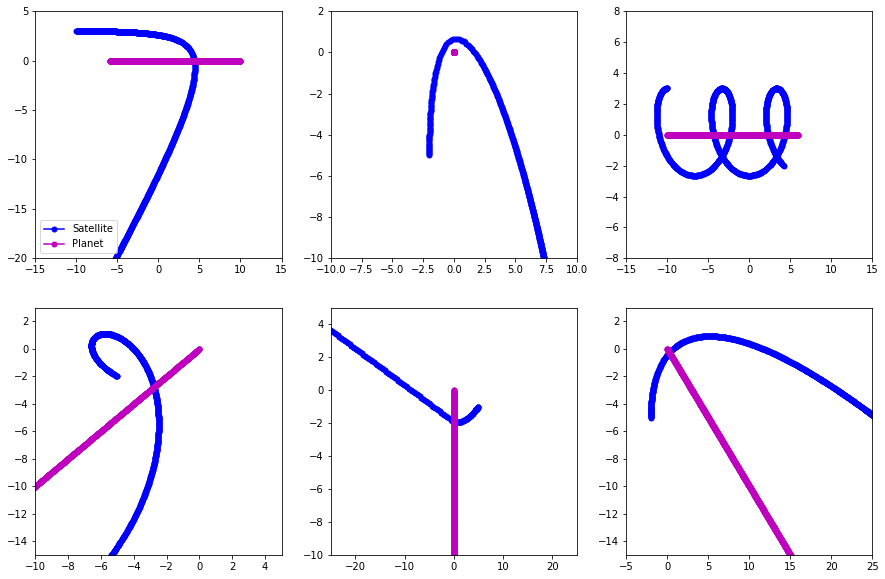

In [10]:
fig = plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
plt.plot(sat_xl, sat_yl, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_pl, y_pl, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-15, 15)
plt.ylim(-20, 5)
plt.legend(loc = 'lower left')

plt.subplot(2, 3, 2)
plt.plot(sat_x3, sat_y3, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_3, y_3, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-10, 15)
plt.ylim(-4, 8)
plt.xlim(-10, 10)
plt.ylim(-10, 2)

plt.subplot(2, 3, 3)
plt.plot(sat_xor, sat_yor, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_por, y_por, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-15, 15)
plt.ylim(-8, 8)

plt.subplot(2, 3, 4)
plt.plot(sat_x4, sat_y4, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_4, y_4, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-10, 5)
plt.ylim(-15, 3)


plt.subplot(2, 3, 5)
plt.plot(sat_x5, sat_y5, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_5, y_5, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-25, 25)
plt.ylim(-10, 5)

plt.subplot(2, 3, 6)
plt.plot(sat_x6, sat_y6, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_6, y_6, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-5, 25)
plt.ylim(-15, 3)

plt.show()

In [11]:
fig = plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
line1, = plt.plot([], 's', color = 'c', markersize = 2)
line2, = plt.plot([], 'o', color = 'c', markersize = 9, label = 'planet')
line3, = plt.plot([], '-', color = 'm')
line4, = plt.plot([], 's', color = 'm', label = 'satellite')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.legend(loc = "lower left")
plt.xlim(-15, 15)
plt.ylim(-20, 5)

plt.subplot(2, 3, 2)
line9, = plt.plot([], 's', color = 'c', markersize = 2)
line10, = plt.plot([], 'o', color = 'c', markersize = 9)
line11, = plt.plot([], '-', color = 'm')
line12, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-10, 10)
plt.ylim(-10, 2)

plt.subplot(2, 3, 3)
line5, = plt.plot([], 's', color = 'c', markersize = 2)
line6, = plt.plot([], 'o', color = 'c', markersize = 9)
line7, = plt.plot([], '-', color = 'm')
line8, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-15, 15)
plt.ylim(-8, 8)

plt.subplot(2, 3, 4)
line13, = plt.plot([], 's', color = 'c', markersize = 2)
line14, = plt.plot([], 'o', color = 'c', markersize = 9)
line15, = plt.plot([], '-', color = 'm')
line16, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-10, 5)
plt.ylim(-15, 3)

plt.subplot(2, 3, 5)
line17, = plt.plot([], 's', color = 'c', markersize = 2)
line18, = plt.plot([], 'o', color = 'c', markersize = 9)
line19, = plt.plot([], '-', color = 'm')
line20, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-25, 25)
plt.ylim(-10, 5)

plt.subplot(2, 3, 6)
line21, = plt.plot([], 's', color = 'c', markersize = 2)
line22, = plt.plot([], 'o', color = 'c', markersize = 9)
line23, = plt.plot([], '-', color = 'm')
line24, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-5, 25)
plt.ylim(-15, 3)


def animate(frame):
    
    line1.set_data(x_pl[:frame *2], y_pl[:frame *2])
    line2.set_data(x_pl[frame *2], y_pl[frame *2])
    line3.set_data(sat_xl[:frame *2], sat_yl[:frame *2])
    line4.set_data(sat_xl[frame *2], sat_yl[frame *2])
    
    line5.set_data(x_por[:frame *2], y_por[:frame *2])
    line6.set_data(x_por[frame *2], y_por[frame *2])
    line7.set_data(sat_xor[:frame *2], sat_yor[:frame *2])
    line8.set_data(sat_xor[frame *2], sat_yor[frame *2])
    
    line9.set_data(x_3[:frame *2], y_3[:frame *2])
    line10.set_data(x_3[frame *2], y_3[frame *2])
    line11.set_data(sat_x3[:frame *2], sat_y3[:frame *2])
    line12.set_data(sat_x3[frame *2], sat_y3[frame *2])
    
    line13.set_data(x_4[:frame *2], y_4[:frame *2])
    line14.set_data(x_4[frame *2], y_4[frame *2])
    line15.set_data(sat_x4[:frame *2], sat_y4[:frame *2])
    line16.set_data(sat_x4[frame *2], sat_y4[frame *2])
    
    line17.set_data(x_5[:frame *2], y_5[:frame *2])
    line18.set_data(x_5[frame *2], y_5[frame *2])
    line19.set_data(sat_x5[:frame *2], sat_y5[:frame *2])
    line20.set_data(sat_x5[frame *2], sat_y5[frame *2])
    
    line21.set_data(x_6[:frame *2], y_6[:frame *2])
    line22.set_data(x_6[frame *2], y_6[frame *2])
    line23.set_data(sat_x6[:frame *2], sat_y6[:frame *2])
    line24.set_data(sat_x6[frame *2], sat_y6[frame *2])
    
    return line1, line2, line3, line4, line5, line6, line7, line8



anim = FuncAnimation(fig, animate, frames = len(x_pl) // 3, interval = 20)
plt.close()
HTML(anim.to_html5_video())

In [12]:
anim.save('GA6panel.mp4', writer="ffmpeg")